In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.stats import zscore

df = pd.read_parquet(r"D:\1st_Year_QMS\TrueBeacon\data.parquet")
#df.to_excel(r"D:\1st_Year_QMS\TrueBeacon\data.xlsx")

# Reset index and add index column
df.reset_index(inplace=True)

# Output the DataFrame with the index column
#print(df)
df

,time,banknifty,nifty,tte
0,2021-01-01 09:15:00,0.286058,0.199729,27
1,2021-01-01 09:16:00,0.285381,0.200433,27
2,2021-01-01 09:17:00,0.284233,0.200004,27
3,2021-01-01 09:18:00,0.286104,0.199860,27
4,2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28
690508,2022-06-30 15:27:00,0.240875,0.216558,28
690509,2022-06-30 15:28:00,0.242115,0.216794,28
690510,2022-06-30 15:29:00,0.243426,0.216455,28


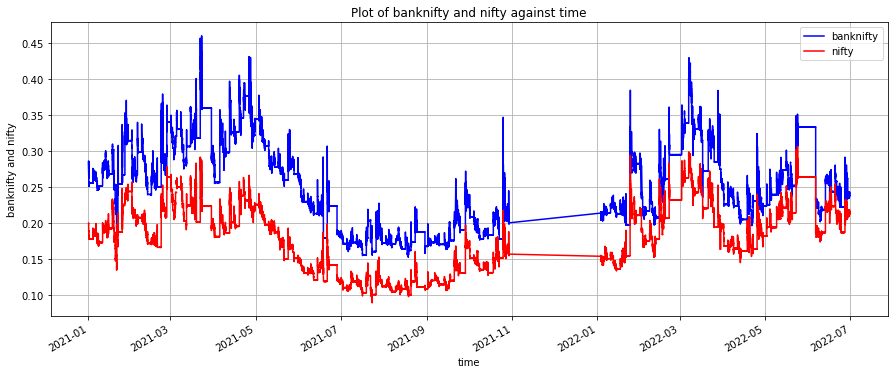

In [2]:
df.plot(x='time', y=['banknifty', 'nifty'], figsize=(15, 6), color=['blue', 'red'], grid=True)
plt.xlabel('time')
plt.ylabel('banknifty and nifty')
plt.title('Plot of banknifty and nifty against time')
plt.legend()
plt.show()

In [3]:
# Filter data for Monday to Friday
df = df[df['time'].dt.dayofweek <= 4]  # Monday is 0, Friday is 4

# Filter data between 9:15 am and 3:30 pm
df = df[(df['time'].dt.hour > 9) | ((df['time'].dt.hour == 9) & (df['time'].dt.minute >= 15))]  # After 9:15 am
df = df[(df['time'].dt.hour < 15) | ((df['time'].dt.hour == 15) & (df['time'].dt.minute <= 30))]  # Before 3:30 pm

# Output the filtered DataFrame
df

,time,banknifty,nifty,tte
0,2021-01-01 09:15:00,0.286058,0.199729,27
1,2021-01-01 09:16:00,0.285381,0.200433,27
2,2021-01-01 09:17:00,0.284233,0.200004,27
3,2021-01-01 09:18:00,0.286104,0.199860,27
4,2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28
690508,2022-06-30 15:27:00,0.240875,0.216558,28
690509,2022-06-30 15:28:00,0.242115,0.216794,28
690510,2022-06-30 15:29:00,0.243426,0.216455,28


In [4]:
#df.to_excel(r"D:\1st_Year_QMS\TrueBeacon\data_WeekDays.xlsx")

In [5]:
df['Date'] = df['time'].dt.date
df['Time'] = df['time'].dt.time

# Drop the original 'datetime_column' if needed
# df.drop(columns=['datetime_column'], inplace=True)

# Output the modified DataFrame
df

,time,banknifty,nifty,tte,Date,Time
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00
...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00


In [6]:
# Create a new column with day names
df['day_names'] = df['time'].dt.day_name()

# Output the modified DataFrame
df

,time,banknifty,nifty,tte,Date,Time,day_names
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00,Friday
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00,Friday
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00,Friday
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00,Friday
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00,Friday
...,...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00,Thursday
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00,Thursday
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00,Thursday
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00,Thursday


In [7]:
# Read the Holiday Excel sheet into a DataFrame
# The list of market holidays is taken from:
# https://www.5paisa.com/stock-market-holidays-2021
# https://www.5paisa.com/stock-market-holidays-2022
excel_df = pd.read_excel(r"D:\1st_Year_QMS\TrueBeacon\NSE_Holidays2021_2022.xlsx")

# Extract the dates from the column
excel_dates = excel_df['Holidays'].dt.date
#excel_dates

# Remove rows where 'Date' column date matches any date from the Holidays Excel sheet column
df = df[~(df['Date'].isin(excel_dates))]

# Output the modified DataFrame
df

,time,banknifty,nifty,tte,Date,Time,day_names
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00,Friday
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00,Friday
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00,Friday
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00,Friday
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00,Friday
...,...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00,Thursday
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00,Thursday
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00,Thursday
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00,Thursday


In [8]:
#df.to_excel(r"D:\1st_Year_QMS\TrueBeacon\data_NoHoliday.xlsx")

In [9]:
missing_values = df.isnull().sum()

# Print the number of missing values along with column names
for column_name, missing_count in missing_values.items():
    print(f"Column '{column_name}' has {missing_count} missing values.")

Column 'time' has 0 missing values.
Column 'banknifty' has 253 missing values.
Column 'nifty' has 336 missing values.
Column 'tte' has 0 missing values.
Column 'Date' has 0 missing values.
Column 'Time' has 0 missing values.
Column 'day_names' has 0 missing values.


In [10]:
# Define a rolling window of size 11 (5 previous + 5 next + current value)
rolling_window1 = df['banknifty'].rolling(window=11, min_periods=1, center=True)
rolling_window2 = df['nifty'].rolling(window=11, min_periods=1, center=True)

# Calculate the mean of the rolling window
mean_values1 = rolling_window1.mean()
mean_values2 = rolling_window2.mean()

# Fill blank cells with the calculated mean values
df['banknifty'] = df['banknifty'].fillna(mean_values1)
df['nifty'] = df['nifty'].fillna(mean_values2)
df

"""df['banknifty'] = df['banknifty'].fillna((df['banknifty'].shift() + df['banknifty'].shift(-1)) / 2)
df['nifty'] = df['nifty'].fillna((df['nifty'].shift() + df['nifty'].shift(-1)) / 2)
df"""

C:\Users\Aero\AppData\Local\Temp\ipykernel_2780\1473870555.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['banknifty'] = df['banknifty'].fillna(mean_values1)
C:\Users\Aero\AppData\Local\Temp\ipykernel_2780\1473870555.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nifty'] = df['nifty'].fillna(mean_values2)


"df['banknifty'] = df['banknifty'].fillna((df['banknifty'].shift() + df['banknifty'].shift(-1)) / 2)\ndf['nifty'] = df['nifty'].fillna((df['nifty'].shift() + df['nifty'].shift(-1)) / 2)\ndf"

In [11]:
missing_values1 = df.isnull().sum()

# Print the number of missing values along with column names
for column_name, missing_count in missing_values1.items():
    print(f"Column '{column_name}' has {missing_count} missing values.")

Column 'time' has 0 missing values.
Column 'banknifty' has 0 missing values.
Column 'nifty' has 0 missing values.
Column 'tte' has 0 missing values.
Column 'Date' has 0 missing values.
Column 'Time' has 0 missing values.
Column 'day_names' has 0 missing values.


In [12]:
# Step 2: Base Model: Z-Score Trading System
import numpy as np
from scipy.stats import zscore
#def z_score_trading_strategy(data, entry_threshold=1.0, exit_threshold=0.5):
data = df.copy()
entry_threshold=1.0
exit_threshold=0.5
data['spread'] = data['banknifty'] - data['nifty']
data['z_score'] = zscore(data['spread'])
data['position'] = np.where(data['z_score'] > entry_threshold, -1, 0)
data['position'] = np.where(data['z_score'] < -entry_threshold, 1, data['position'])
data['position'] = np.where(abs(data['z_score']) < exit_threshold, 0, data['position'])
#return data

# Simulate trading based on z-score signals
#data = z_score_trading_strategy(df)

# Calculate P/L using the provided formula
#data['time_to_expiry'] = ...  # Implement time to expiry calculation
data['P/L_base'] = data['spread'] * (data['tte'] ** 0.7)
data

,time,banknifty,nifty,tte,Date,Time,day_names,spread,z_score,position,P/L_base
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00,Friday,0.086329,0.516009,0,0.867184
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00,Friday,0.084948,0.463850,0,0.853317
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00,Friday,0.084229,0.436666,0,0.846089
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00,Friday,0.086244,0.512778,0,0.866325
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00,Friday,0.086588,0.525794,0,0.869786
...,...,...,...,...,...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00,Thursday,0.025943,-1.765519,1,0.267320
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00,Thursday,0.024317,-1.826972,1,0.250560
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00,Thursday,0.025321,-1.789020,1,0.260910
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00,Thursday,0.026971,-1.726679,1,0.277912


In [13]:
#data['P/L'].sum()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 3: Advanced Model: Machine Learning Approach
def machine_learning_model(data):
    # Feature Engineering
    data['lag1_spread'] = data['spread'].shift(1)
    data['lag2_spread'] = data['spread'].shift(2)
    data['lag3_spread'] = data['spread'].shift(3)
    
    # Drop NaN values resulting from shift operation
    data.dropna(inplace=True)
    
    # Split data into features (X) and target (y)
    X = data[['lag1_spread', 'lag2_spread', 'lag3_spread']].values
    y = data['spread'].values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    
    # Generate trading signals based on predicted spread
    data['predicted_spread'] = rf_regressor.predict(data[['lag1_spread', 'lag2_spread', 'lag3_spread']].values)
    data['position'] = np.where(data['predicted_spread'] > 0, -1, 1)  # Short if predicted spread is positive, long otherwise
    
    return data

# Apply the machine learning model
data = machine_learning_model(data)

# Calculate P/L using the provided formula
#data['time_to_expiry'] = ...  # Implement time to expiry calculation
data['P/L_adv'] = data['predicted_spread'] * (data['tte'] ** 0.7)

# Step 4: Performance Comparison
# Evaluate the performance of both models and compare metrics

# Step 5: Documentation and Reporting
# Provide detailed explanation, summary of results, and findings

# Print the first few rows of the processed data
data

Mean Squared Error: 1.8173834512129437e-05


,time,banknifty,nifty,tte,Date,Time,day_names,spread,z_score,position,P/L_base,lag1_spread,lag2_spread,lag3_spread,predicted_spread,P/L_adv,cumulative_pl_base,cumulative_pl_adv,daily_returns_base,daily_returns_adv
6,2021-01-01 09:21:00,0.280548,0.196864,27,2021-01-01,09:21:00,Friday,0.083683,0.416036,-1,0.840605,0.084715,0.086588,0.086244,0.084756,0.851387,3.427687,3.427687,0.840605,0.840605
7,2021-01-01 09:22:00,0.281871,0.196726,27,2021-01-01,09:22:00,Friday,0.085145,0.471293,-1,0.855296,0.083683,0.084715,0.086588,0.084379,0.847599,4.282983,4.282983,0.855296,0.855296
8,2021-01-01 09:23:00,0.280768,0.197460,27,2021-01-01,09:23:00,Friday,0.083308,0.401868,-1,0.836838,0.085145,0.083683,0.084715,0.083918,0.842966,5.119821,5.119821,0.836838,0.836838
9,2021-01-01 09:24:00,0.282884,0.197003,27,2021-01-01,09:24:00,Friday,0.085880,0.499063,-1,0.862679,0.083308,0.085145,0.083683,0.083189,0.835642,5.982500,5.982500,0.862679,0.862679
10,2021-01-01 09:25:00,0.283414,0.196805,27,2021-01-01,09:25:00,Friday,0.086609,0.526569,-1,0.869992,0.085880,0.083308,0.085145,0.086570,0.869607,6.852492,6.852492,0.869992,0.869992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00,Thursday,0.025943,-1.765519,-1,0.267320,0.025162,0.025047,0.025641,0.025724,0.265064,60703.357895,60703.357895,0.267320,0.267320
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00,Thursday,0.024317,-1.826972,-1,0.250560,0.025943,0.025162,0.025047,0.025254,0.260218,60703.608455,60703.608455,0.250560,0.250560
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00,Thursday,0.025321,-1.789020,-1,0.260910,0.024317,0.025943,0.025162,0.025018,0.257786,60703.869366,60703.869366,0.260910,0.260910
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00,Thursday,0.026971,-1.726679,-1,0.277912,0.025321,0.024317,0.025943,0.024378,0.251198,60704.147278,60704.147278,0.277912,0.277912


In [15]:
#data['P/L'].sum()

In [16]:
#data.to_excel(r"D:\1st_Year_QMS\TrueBeacon\data_MLmodel.xlsx")

In [19]:
# Step 4: Performance Comparison
def evaluate_performance(data):
    # Calculate cumulative P/L for both models
    data['cumulative_pl_base'] = data['P/L_base'].cumsum()
    data['cumulative_pl_adv'] = data['P/L_adv'].cumsum()
    
    # Calculate daily returns for both models
    data['daily_returns_base'] = data['cumulative_pl_base'].diff()
    data['daily_returns_adv'] = data['cumulative_pl_adv'].diff()
    
    # Calculate metrics: Absolute P/L, Sharpe Ratio, and Drawdown
    metrics_base = {
        'Absolute P/L': data['cumulative_pl_base'].iloc[-1],
        'Sharpe Ratio': data['daily_returns_base'].mean() / data['daily_returns_base'].std(),
        'Drawdown': (data['cumulative_pl_base'] - data['cumulative_pl_base'].cummax()).min()
    }
    
    metrics_advanced = {
        'Absolute P/L': data['cumulative_pl_adv'].iloc[-1],
        'Sharpe Ratio': data['daily_returns_adv'].mean() / data['daily_returns_adv'].std(),
        'Drawdown': (data['cumulative_pl_adv'] - data['cumulative_pl_adv'].cummax()).min()
    }
    
    return metrics_base, metrics_advanced

# Evaluate performance of both models
metrics_base, metrics_advanced = evaluate_performance(data)

# Print performance metrics
print("Base Model Performance:")
for metric, value in metrics_base.items():
    print(f"{metric}: {value}")

print("\nAdvanced Model Performance:")
for metric, value in metrics_advanced.items():
    print(f"{metric}: {value}")

Base Model Performance:
Absolute P/L: 60701.82631972032
Sharpe Ratio: 1.7158149074964468
Drawdown: -0.07677310948929517

Advanced Model Performance:
Absolute P/L: 60681.68079118116
Sharpe Ratio: 1.7240511862364147
Drawdown: -0.027480895871121902
